# Pre-Processing of Data

In [2]:
# Misc
import os
import sys
from timeit import default_timer as timer 
import datetime
now = datetime.datetime.now()

# Data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np


# Sanity check for jupyter notebooks
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\gabri\Documents\GitHub\IceClassic\PreProcessData


#  Data Sources
The tripod is on the Tenana River in Nenana, a couple hundred feet from the [Mears Memorial Bridge](https://www.google.com/maps/place/Mears+Memorial+Bridge/@64.5673074,-149.0813003,17z/data=!3m1!4b1!4m6!3m5!1s0x513297804d87b329:0xbf991116ff77a5ad!8m2!3d64.5673074!4d-149.0787254!16s%2Fm%2F04zw16f?entry=ttu) (64.57°, -149.08°)

## 1. Temperature
### 1.1 [Berkeley Earth Global Temperature](https://berkeleyearth.org/)
- Average daily temperature 1880/01/01 to 2022/07/31
- Resolution 1° x  1°
### 1.2 [NOAA GHCN Data (Temperature)](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00026435/detail)
- Nearby weather stations
    - NENANA MUNICIPAL AIRPORT, AK US (USW00026435)
    - FAIRBANKS INTERNATIONAL AIRPORT, AK US (USW00026411)
- Maxima, minima and simply-averaged daily temperature 1916/12/01 to 2024/02/01
### 1.3 [USGS Water Data (Temperature) ](https://waterdata.usgs.gov/nwis/rt)
-  Nearby weather station USGS 15515500 TANANA R AT NENANA AK
- Maxima, minima and simply-averaged daily temperature 2016/04/25  onwards
## 2. Precipitation
### 2.1 [NOAA GHCN Data (Precipitation)](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00026435/detail)
- Nearby weather stations
    - NENANA MUNICIPAL AIRPORT, AK US (USW00026435)
    - FAIRBANKS INTERNATIONAL AIRPORT, AK US (USW00026411)
- Daily precipitation, snow and snow depth data (humidity and wind also available)

## 3. Discharge
### 3.1 [USGS Water Data ](https://waterdata.usgs.gov/nwis/rt)
-  Nearby weather stations
    - USGS 15515500 TANANA R AT NENANA AK
    - USGS 15485500 Tanana R at Fairbanks AK
- Discharge data from 1962-05-01 and 1973-05-01 respectively

## 4. Ice Thickness & Break-up Times
### 4.1 [Nenana ICE Classic](https://www.nenanaakiceclassic.com/ice) 
- Ice thickness data from 1989.
- Frequency of measurement is irregular ( more frequent as the expected date ( from organizers) approaches?? maybe extract info)

In [65]:
#=======================================================================================================================#
# Loading Berkeley Earth Global Temperature
Temp_Berkeley=pd.read_csv('Berkeley temp data updated.txt',skiprows=48,index_col=0,delimiter=' ' ) 
Temp_Berkeley.index = pd.to_datetime(Temp_Berkeley.index)
#=======================================================================================================================#
# Loading NOAA GHCN Data
columns_to_import = ['DATE','PRCP', 'SNOW','SNWD','TMAX','TMIN'] # there are other field but the coverage is limited

# NENANA Airport
Nenana_pp= pd.read_csv('NOAA_PRPP_NENANA.txt',usecols=columns_to_import,skiprows=629,delimiter='\t')
Nenana_pp['DATE'] = pd.to_datetime(Nenana_pp['DATE'])
Nenana_pp.set_index('DATE', inplace=True)
# Fairbanks Airport
Fairbanks_pp= pd.read_csv('NOAA_PRPP_Fairbanks.txt',usecols=columns_to_import,skiprows=629,delimiter='\t')
Fairbanks_pp['DATE'] = pd.to_datetime(Fairbanks_pp['DATE'])
Fairbanks_pp.set_index('DATE', inplace=True)

Fairbanks_pp.head()
#======================================================================================================================#
#Loading USGS Data
#======================================================================================================================#
# TENANA R Nenana
cols=['datetime','1103_00010_00001','1104_00010_00002','1105_00010_00003','1106_00060_00003']
dict= {'1103_00010_00001': 'Max water temp [C]', '1104_00010_00002': 'Min water temp [C]','1105_00010_00003': 'Mean water temp [C]','1106_00060_00003':'Mean Discharge [m3/s]'}
Nenana_R_1= pd.read_csv('USGS_Tenana_R_Nenana.txt',skiprows=33,usecols=cols,delimiter='\t')
Nenana_R_1.rename(columns=dict,
          inplace=True)
Nenana_R_1['datetime'] = pd.to_datetime(Nenana_R_1['datetime'])
Nenana_R_1.set_index('datetime', inplace=True)

# changing units from ft^3/s to m3/s ( when we change the name we change it to new units ( original unit are ft^3 as we can see in documentation)
Nenana_R_1['Mean Discharge [m3/s]']= pd.to_numeric(Nenana_R_1['Mean Discharge [m3/s]'])
Nenana_R_1['Mean Discharge [m3/s]'] = Nenana_R_1['Mean Discharge [m3/s]']*0.02832 # to  m^3/s (cubic meters per second) 



# TENANA R Fairbanks
cols=['datetime','1085_00060_00003']
dict= {'1085_00060_00003':'Mean Discharge [m3/s]'}
Nenana_R_2= pd.read_csv('USGS_Tenana_R_Fairbanks.txt',skiprows=29,usecols=cols,delimiter='\t')
Nenana_R_2.rename(columns=dict,
          inplace=True)
Nenana_R_2['datetime'] = pd.to_datetime(Nenana_R_2['datetime'])
Nenana_R_2.set_index('datetime', inplace=True)

# changing units from ft^3/s to m3/s
Nenana_R_2['Mean Discharge [m3/s]']= pd.to_numeric(Nenana_R_2['Mean Discharge [m3/s]'])
Nenana_R_2['Mean Discharge [m3/s]'] = Nenana_R_2['Mean Discharge [m3/s]']*0.02832 # to  m^3/s (cubic meters per second) 

#======================================================================================================================#
#Loading ICE Classic Data
#======================================================================================================================#

#Ice Thickness
cols=['timestamp','IceThickness [cm]']
ice_thickness=pd.read_csv('Nenana_Ice_Classic_Ice_Thickness.txt',skiprows=6,usecols=cols,delimiter='\t')
ice_thickness['timestamp'] = pd.to_datetime(ice_thickness['timestamp'])
ice_thickness.set_index('timestamp', inplace=True)

# Break-up-times
break_up_times=pd.read_csv('BreakUpTimes.csv')
break_up_times.head()
break_up_times['timestamp'] = pd.to_datetime(break_up_times[['Year', 'Month', 'Day']])  # want index wiht only date not time
break_up_times['timestamps'] = pd.to_datetime(break_up_times['timestamp'])
break_up_times.set_index('timestamp', inplace=True)

# A collection of simple plots

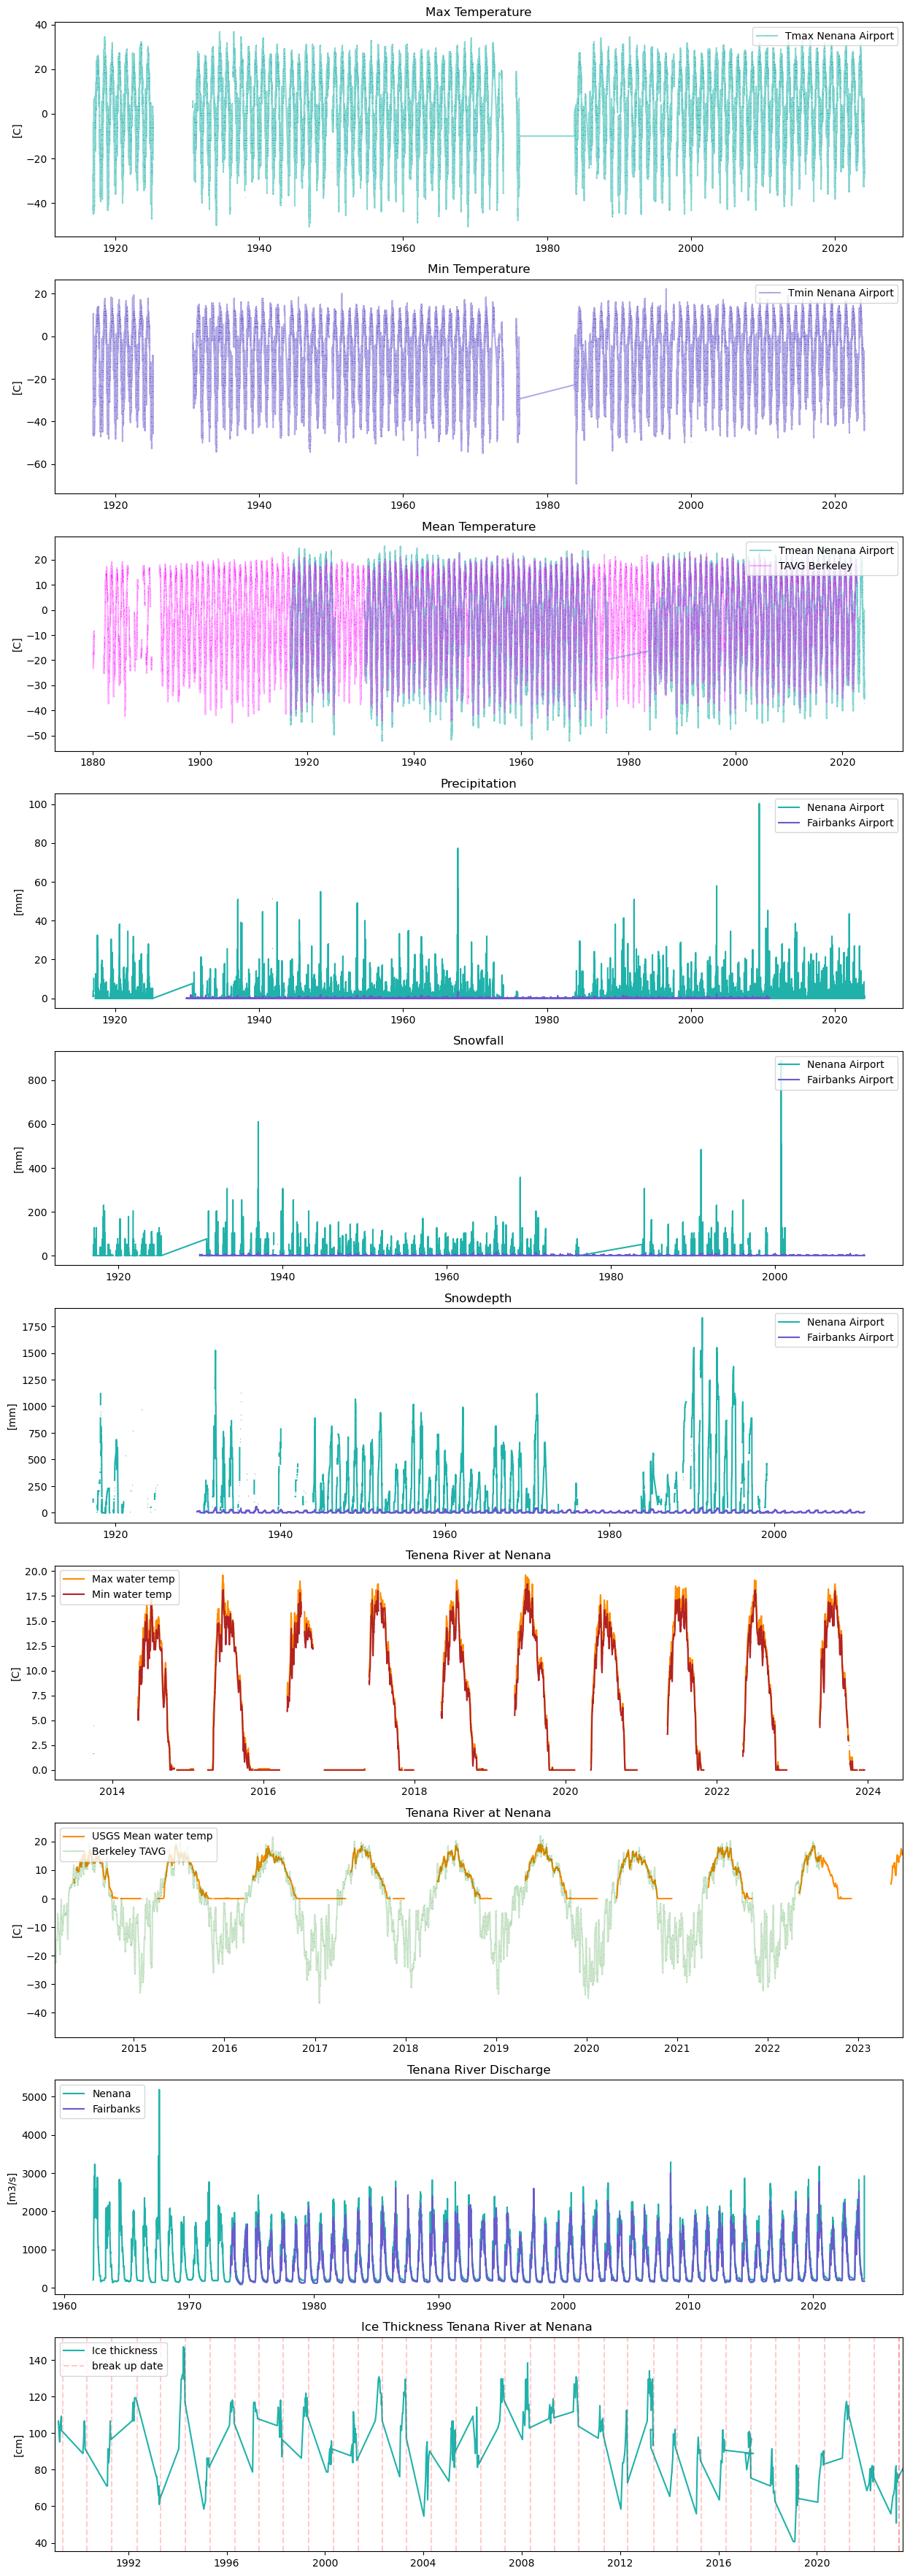

In [66]:
fig, ax1 = plt.subplots(10,1,figsize=(15, 45)) 
color1='lightseagreen'
color2='slateblue'
color3='darkorange'
color4='firebrick'



ax1[0].plot(Nenana_pp['TMAX'],marker=',',label="Tmax Nenana Airport",color=color1,alpha=0.5)
#ax1[0].plot(Fairbanks_pp['TMAX'],marker=',',label="Tmax Fairbanks Airport",color=color3,alpha=0.5)
ax1[0].tick_params(axis='y')
ax1[0].set_ylabel("[C]")
ax1[0].legend(loc='upper right')
ax1[0].set_title("Max Temperature")



ax1[1].plot(Nenana_pp['TMIN'],marker=',',label="Tmin Nenana Airport",color=color2,alpha=0.5)
#ax1[1].plot(Fairbanks_pp['TMIN'],marker=',',label="Tmin Fairbanks Airport",color=color4,alpha=0.5)
ax1[1].tick_params(axis='y')
ax1[1].set_ylabel("[C]")
ax1[1].legend(loc='upper right')
ax1[1].set_title("Min Temperature")


ax1[2].plot(0.5*(Nenana_pp['TMAX']+Nenana_pp['TMIN']),marker=',',label="Tmean Nenana Airport",color=color1,alpha=0.5)
#ax1[2].plot(0.5*(Fairbanks_pp['TMAX']+Fairbanks_pp['TMIN']),marker=',',label="Tmin Nenana Airport",color=color3,alpha=0.5)
ax1[2].plot(Temp_Berkeley,marker=',',label="TAVG Berkeley ",color='magenta',alpha=0.3)
ax1[2].tick_params(axis='y')
ax1[2].tick_params(axis='y')
ax1[2].set_ylabel("[C]")
ax1[2].legend(loc='upper right')
ax1[2].set_title("Mean Temperature")


ax1[3].plot(Nenana_pp['PRCP'],marker=',',label="Nenana Airport",color=color1)
ax1[3].plot(Fairbanks_pp['PRCP'],marker=',',label="Fairbanks Airport",color=color2)
ax1[3].tick_params(axis='y')
ax1[3].set_ylabel("[mm]")
ax1[3].legend(loc='upper right')
ax1[3].set_title("Precipitation")


ax1[4].plot(Nenana_pp['SNOW'],marker=',',label="Nenana Airport",color=color1)
ax1[4].plot(Fairbanks_pp['SNOW'],marker=',',label="Fairbanks Airport",color=color2)
ax1[4].tick_params(axis='y')
ax1[4].set_ylabel("[mm]")
ax1[4].legend(loc='upper right')
ax1[4].set_title("Snowfall")


ax1[5].plot(Nenana_pp['SNWD'],marker=',',label="Nenana Airport",color=color1)
ax1[5].plot(Fairbanks_pp['SNWD'],marker=',',label="Fairbanks Airport",color=color2)
ax1[5].tick_params(axis='y')
ax1[5].set_ylabel("[mm]")
ax1[5].legend(loc='upper right')
ax1[5].set_title("Snowdepth")

ax1[6].plot(Nenana_R_1['Max water temp [C]'],marker=',',label="Max water temp",color=color3)
ax1[6].plot(Nenana_R_1['Min water temp [C]'],marker=',',label="Min water temp",color=color4)
ax1[6].tick_params(axis='y')
ax1[6].set_ylabel("[C]")
ax1[6].legend(loc='upper left')
ax1[6].set_title("Tenena River at Nenana")

ax1[7].plot(Nenana_R_1['Mean water temp [C]'],marker=',',label="USGS Mean water temp",color=color3)
ax1[7].plot(Temp_Berkeley,marker=',',label="Berkeley TAVG",color='green',alpha=0.2)
ax1[7].tick_params(axis='y')
ax1[7].set_ylabel("[C]")
ax1[7].legend(loc='upper left')
ax1[7].set_title("Tenana River at Nenana")
ax1[7].set_xlim(pd.Timestamp('2014-02-15'), pd.Timestamp('2023-07-01'))

ax1[8].plot(Nenana_R_1['Mean Discharge [m3/s]'],marker=',',label="Nenana",color=color1)
ax1[8].plot(Nenana_R_2['Mean Discharge [m3/s]'],marker=',',label="Fairbanks",color=color2)
ax1[8].tick_params(axis='y')
ax1[8].set_ylabel("[m3/s]")
ax1[8].legend(loc='upper left')
ax1[8].set_title("Tenana River Discharge")


ax1[9].plot(ice_thickness,marker=',',label="Ice thickness",color=color1)
#ax1[8].plot(Nenana_R_2['Mean Discharge [m3/s]'],marker=',',label="Fairbanks",color=color2)
ax1[9].tick_params(axis='y')
ax1[9].set_ylabel("[cm]")
ax1[9].set_title("Ice Thickness Tenana River at Nenana ")
# Plot vertical lines for each index value
for datetime_value in break_up_times.index:
    plt.axvline(x=datetime_value, color='r', linestyle='--',alpha=0.2)
plt.axvline(x=datetime_value, color='r', linestyle='--',alpha=0.2,label="break up date" ) # lazy way to get only onw legend
ax1[9].set_xlim(pd.Timestamp('1989-01-01'), pd.Timestamp('2023-07-01'))
ax1[9].legend(loc='upper left')
plt.show()